In [ ]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#data acquisition
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
#dataframe of dataset
wine_data = wine.data
wine_names = wine.feature_names
wine_df = pd.DataFrame(wine_data,columns=wine.feature_names)
wine_label = pd.DataFrame(wine.target,columns=["label"])
wine_df = pd.concat([wine_df,wine_label],axis=1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#info(),description()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

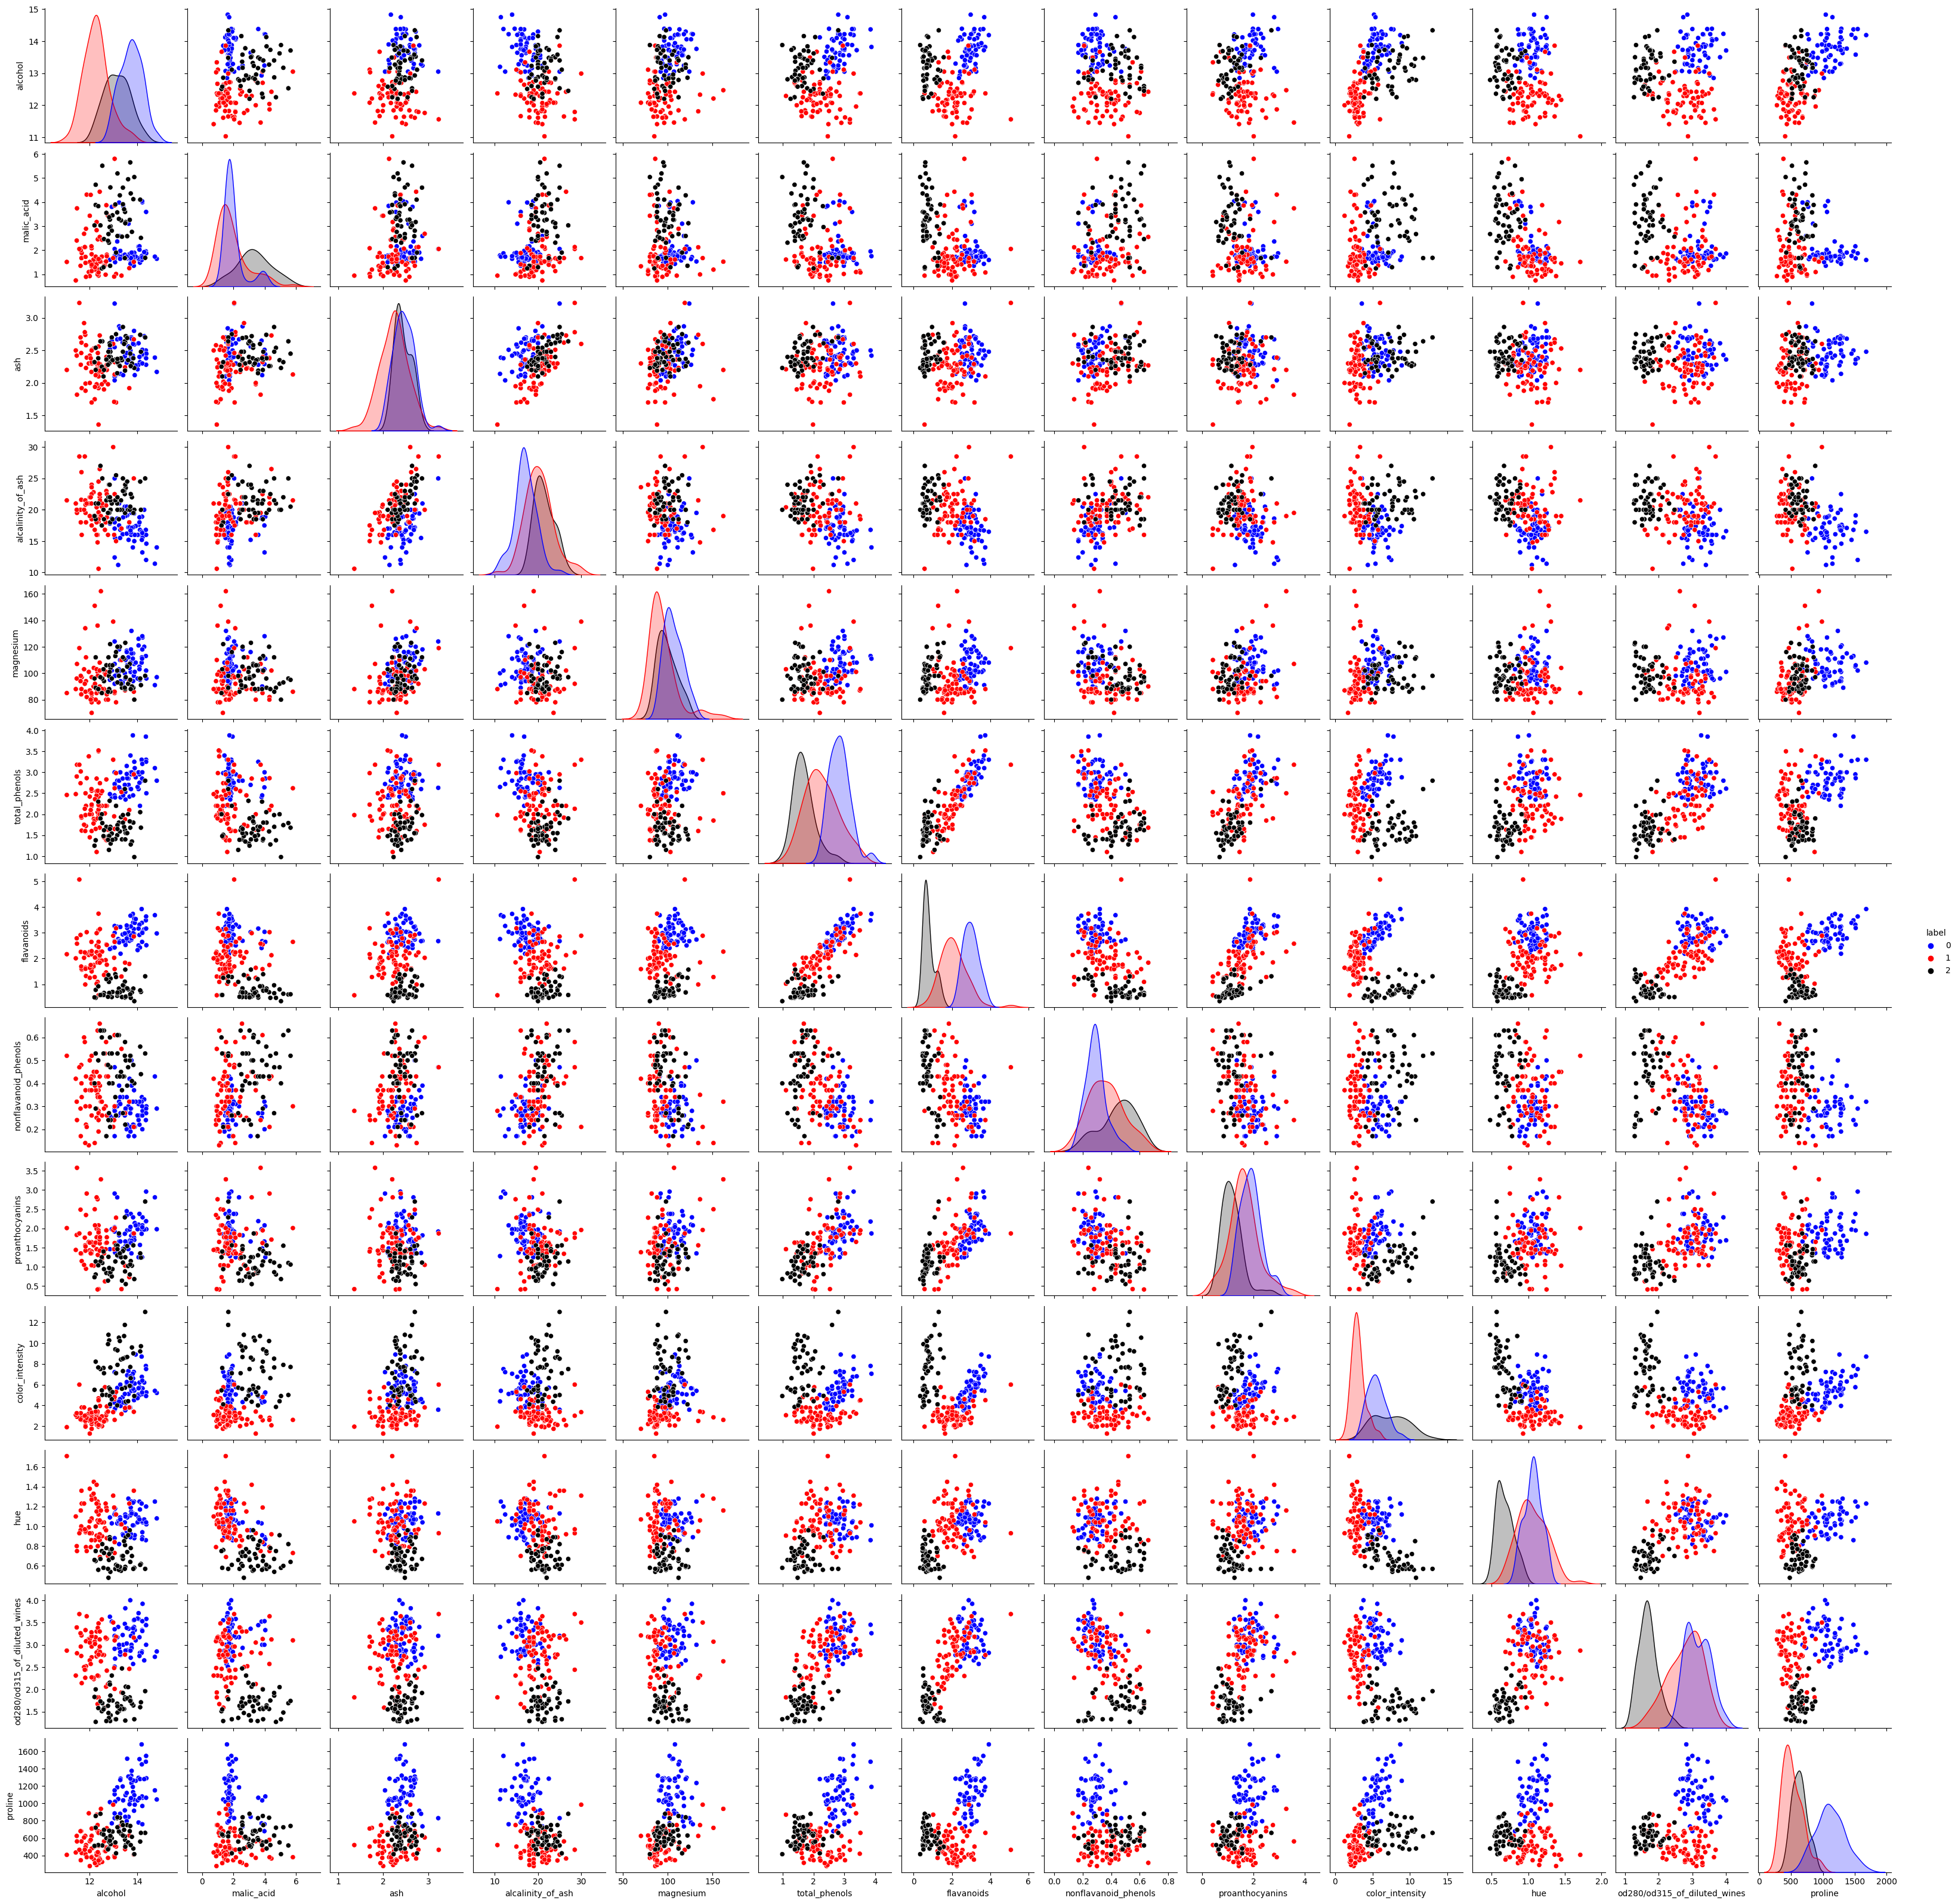

In [ ]:
sns.pairplot(wine_df,hue="label",palette=["blue","red","black"])

<Axes: xlabel='label', ylabel='alcohol'>

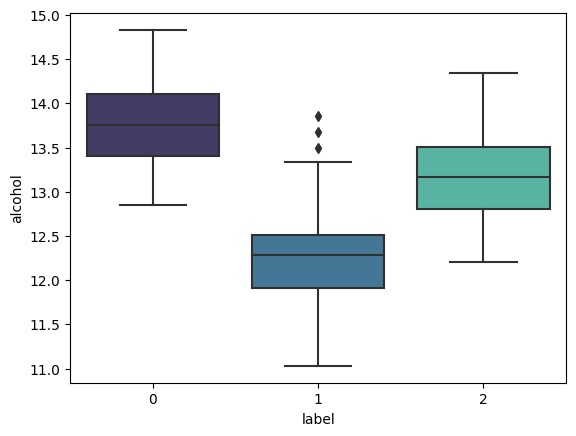

In [ ]:
sns.boxplot(x="label",y="alcohol",data=wine_df,palette="mako")
#clear distinction in alcohol quantities in label classes

<Axes: xlabel='label', ylabel='malic_acid'>

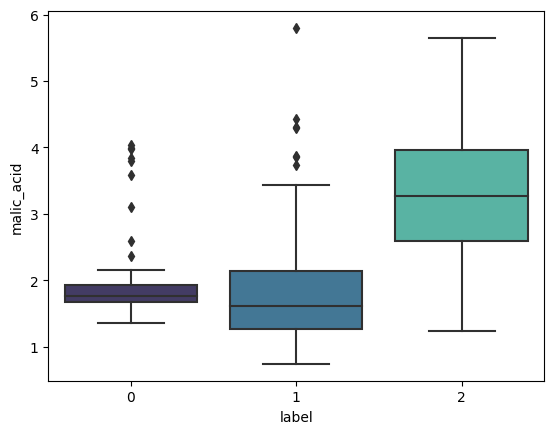

In [ ]:
sns.boxplot(x="label",y="malic_acid",data=wine_df,palette="mako")

<Axes: xlabel='label', ylabel='total_phenols'>

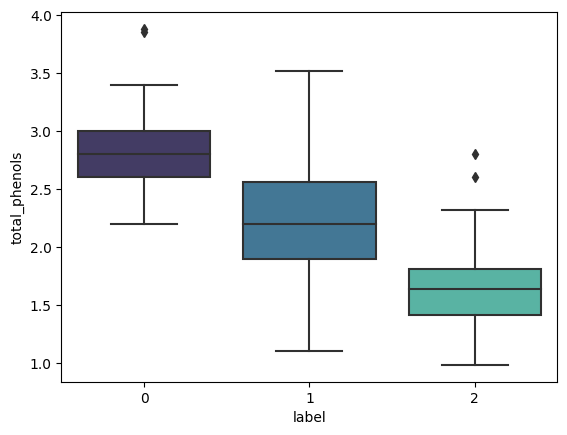

In [ ]:
sns.boxplot(x="label",y="total_phenols",data=wine_df,palette="mako")
#class one has wide range of total_phenol values

<Axes: xlabel='label', ylabel='color_intensity'>

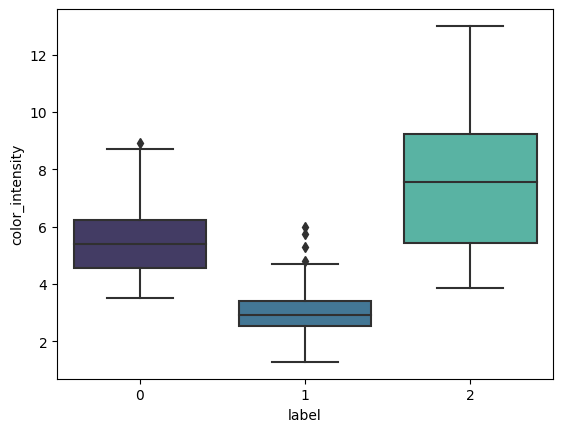

In [ ]:
sns.boxplot(x="label",y="color_intensity",data=wine_df,palette="mako")

In [ ]:
# pre-processing data
st_sclr = StandardScaler()
st_sclr.fit(wine_df.drop("label",axis=1))
wine_ft = st_sclr.transform(wine_df.drop("label",axis=1))


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
#data splitting
X = wine_ft
y=wine_df["label"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#training model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#testing
predictions = knn.predict(X_test)

In [ ]:
#metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.85      0.92        27
           2       1.00      1.00      1.00        11

    accuracy                           0.93        54
   macro avg       0.93      0.95      0.94        54
weighted avg       0.94      0.93      0.93        54

[[16  0  0]
 [ 4 23  0]
 [ 0  0 11]]


In [ ]:
#testing k values for minimum error rate
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(y_test!=predictions))

Text(0, 0.5, 'error_rate')

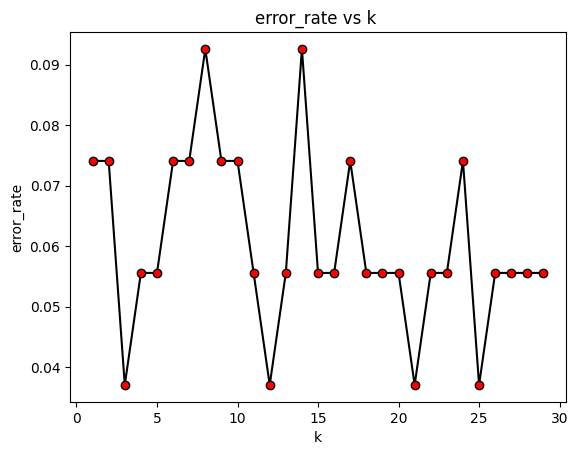

In [ ]:
#plotting error rate and k values
plt.plot(range(1,30),error_rate,color="black",marker="o",markerfacecolor="red",linestyle="-")
plt.title("error_rate vs k ")
plt.xlabel("k")
plt.ylabel("error_rate")
#error rate is differing for k values and its min at 5,12..

In [ ]:
#setting the k value as 12
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [ ]:
#final metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.93      0.96        27
           2       1.00      1.00      1.00        11

    accuracy                           0.96        54
   macro avg       0.96      0.98      0.97        54
weighted avg       0.97      0.96      0.96        54

[[16  0  0]
 [ 2 25  0]
 [ 0  0 11]]
